Looking at matchings of stationary House plan
*and* 
Chain on graph with 30k matchings (aka strict adjacency)

In [22]:
from gerrychain import Graph, Partition, Election
from gerrychain.updaters import Tally, cut_edges
import json
import networkx
from gerrychain import MarkovChain
from gerrychain.constraints import single_flip_contiguous, no_more_discontiguous
from gerrychain.proposals import propose_random_flip
from gerrychain.accept import always_accept
import pandas
from gerrychain import (GeographicPartition, Partition, Graph, MarkovChain,
                        proposals, updaters, constraints, accept, Election)
from functools import partial
from gerrychain.proposals import recom
 
from gerrychain.constraints.validity import within_percent_of_ideal_population
import matplotlib.pyplot as plt
import gerrychain 
import numpy
import geopandas as gpd
#NOTE: must have tqdm installed (pip install tqdm in terminal)

Build Graph, either from .shp or .json 

In [ ]:
#graph = Graph.from_file("/Users/caranix/Desktop/Alaska_Git/AK_precincts_ns/AK_precincts_ns.shp")
#Graph.to_json(graph, "/Users/caranix/Documents/MGGG/AK_graph_ns.json")

In [ ]:
graph = Graph.from_json("/Users/caranix/Documents/MGGG/AK_graph_ns.json")

Make dataframe from shapefile

In [23]:
df= gpd.read_file("/Users/caranix/Desktop/Alaska_Git/AK_precincts_ns/AK_precincts_ns.shp")

"Manually" add/remove edges from graph that are problematic (aka add island edges and remove excess edges)
Note: Use to_add for 30k runs and to_add2 for 180k runs 

In [ ]:
idict={}

for index, row in df.iterrows():

	idict[int(row["ID"])] = index
	
	
to_add = [(426,444), (437,438),(437,442),(411,420),
(411,414), (411,358),(411,407),(399,400),(399,349),(381,384),(240,210)]
	
to_add2 = [(426,444), (437,438), (437,436), (437,423), (437,428), (437,432), (437,374), (437,441), 
(437,443), (437,439), (437,427), (437,430), (437,445), (437,435), (437,434), (437,442), (411,420),
(411,414), (411,358),(411,407), (399,400),(399,349),(381,384),(240,210), (400,411), (399,348),
(399,381),(399,384),(399,386),(399,397)]


for i in range(len(to_add)):
	graph.add_edge(idict[to_add[i][0]],idict[to_add[i][1]])
	
	
	
	
	

to_remove = [(210,195),(210,203),(210,202),(210,193),(210,235),(210,234),(169,78),(169,77),(169,70),
(169,68),(169,32),(169,23),(169,179),(234,78),(235,78),(235,89),(235,106),(235,102),(102,190),
(190,105),(190,145),(145,233),(233,133)]

for i in range(len(to_remove)):
    graph.remove_edge(idict[to_remove[i][0]],idict[to_remove[i][1]])

Define function for pulling out adj matrix. 

In [25]:
def parts_adjacency_matrix(partition):
    parts_graph = networkx.Graph()
    for part in partition.parts:
        parts_graph.add_node(part)
    for edge in partition['cut_edges']:
        source, destination = (partition.assignment[node] for node in edge)
        parts_graph.add_edge(source, destination)
    nodelist = sorted(list(partition.parts.keys()))
    return networkx.to_numpy_matrix(parts_graph, nodelist=nodelist)

Add non-native american population 

In [ ]:
df["nAMIN"] = df["TOTPOP"]-df["AMIN"]
graph.join(df,columns= ["nAMIN"])

In [ ]:
#outmat = parts_adjacency_matrix(ip)

In [ ]:
#election = gerrychain.Election("AK", ["PRES16", "USH14", "SEN16","GOV18","USH16","USH18"])

Build elections object and add updaters + make intial parition (inital partition for stationary graph)

In [26]:
elections = [
    Election("GOV18x", {"Democratic": "GOV18D_x", "Republican": "GOV18R_x"}),
    Election("USH18x", {"Democratic": "USH18D_x", "Republican": "USH18R_x"}),
    Election("GOV18ns", {"Democratic": "GOV18D_NS", "Republican": "GOV18R_NS"}),
    Election("USH18ns", {"Democratic": "USH18D_NS", "Republican": "USH18R_NS"}),
    Election("Native_percent", {"Native":"AMIN", "nonNative":"nAMIN"})
]


In [27]:
#updaters = {"population": gerrychain.updaters.Tally("POPULATION", alias="population"), "AK": election, "cut_edges": gerrychain.updaters.cut_edges}
my_updaters = {"population": updaters.Tally("POPULATION", alias="population")}

election_updaters = {election.name: election for election in elections}
my_updaters.update(election_updaters)

# Create an initial partition
initial_partition = GeographicPartition(graph, assignment="HDIST", updaters=my_updaters) #NOTE: assignment based on House Districts


In [ ]:
#with open("/Users/caranix/Desktop/Alaska_Git/data/small_matchings.json", 'r') as rf:
 #   matchings= json.load(rf)

FOR STATIONARY GRAPH

In [ ]:
parts = []
percents1 = []
wins1 = []
percents2 = []
wins2 = []
percents3 = []
wins3 = []
percents4 = []
wins4 = []

for i in range(len(matchings)):
    temp= {x: 0 for x in range(40)}
    for j in range(20):
        for k in [0,1]:
            temp[matchings[str(i)][j][k]]=j
    df["SENDIST"] = df["HDIST"].map(temp)
    c_part = GeographicPartition(graph, assignment=df["SENDIST"], updaters= my_updaters)
    wins1.append(c_part["GOV18x"].wins("Democratic"))
    percents1.append(sorted(c_part["GOV18x"].percents("Democratic")))
    wins2.append(c_part["GOV18ns"].wins("Democratic"))
    percents2.append(sorted(c_part["GOV18ns"].percents("Democratic")))
    wins3.append(c_part["USH18x"].wins("Democratic"))
    percents3.append(sorted(c_part["USH18x"].percents("Democratic")))
    wins4.append(c_part["USH18ns"].wins("Democratic"))
    percents4.append(sorted(c_part["USH18ns"].percents("Democratic")))
#print(wins)


In [ ]:
#ip = GeographicPartition(graph, assignment=df["HDIST"], updaters= my_updaters)

In [ ]:
#{(initial_partition.assignment[x[0]],initial_partition.assignment[x[1]]) for x in initial_partition["cut_edges"]}

Som visualization stuff 

In [ ]:
import networkx as nx
new_dg = nx.Graph()

In [ ]:
new_dg = nx.Graph()
new_dg.add_edges_from(list({(ip.assignment[x[0]],ip.assignment[x[1]]) for x in ip["cut_edges"]}) )

In [ ]:
nx.draw(new_dg)
with open('AK_inital_state_fixedagain.json', "w") as m:
    m.write(json.dumps(nx.adjacency_matrix(new_dg).todense().tolist()))

In [ ]:
#ip["GOV18x"]

In [ ]:
#initial_partition = GeographicPartition(graph, assignment="HDIST", updaters=my_updaters) #NOTE: assignment based on House Districts
#sorted(initial_partition["Native_percent"].percents("Native"))

In [ ]:
#ip = GeographicPartition(graph, assignment=df["SENDIST"], updaters= my_updaters)

#ip["GOV18ns"].wins("Democratic")


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.distplot(wins4,kde=False)
plt.axvline(x=ip["USH18ns"].wins("Democratic"),color='r',label='Enacted')
plt.axvline(x=np.mean(wins4),color='g',label='Matchings Mean')

plt.legend()

In [ ]:
sorted(percents4[0])

In [ ]:
idict[426] 

Set-up chain for running on matchings! 

In [ ]:
with open("/Users/caranix/Desktop/Alaska_Git/data/30k_matchings.json", 'r') as rf:
    matchings= json.load(rf)

In [ ]:
ideal_population = sum(initial_partition["population"].values()) / len(initial_partition)
#print(ideal_population)

proposal = partial(recom,
                   pop_col="POPULATION",
                   pop_target=ideal_population,
                   epsilon=0.05,
                   node_repeats=2
                  )


compactness_bound = constraints.UpperBound(
    lambda p: len(p["cut_edges"]),
    2*len(initial_partition["cut_edges"])
)

In [33]:
ip = GeographicPartition(graph, assignment=df["HDIST"], updaters= my_updaters)

In [45]:
chain = MarkovChain(
    proposal=proposal, 
    constraints=[
        constraints.within_percent_of_ideal_population(initial_partition, .05),
        compactness_bound, #single_flip_contiguous#no_more_discontiguous
    ],
    accept=accept.always_accept,
    initial_state=ip,
    total_steps=10000
)


#NOTE: The current Alaksa plan does not have population within 2%, I increased it to 5% population deviation.
#NOTE: Alaska is not single flip contiguous.

In [ ]:
#for part in chain:
#    1+1

Deinfe FKT algorithm:

In [54]:
import networkx as nx  # Requires at least netwrokx 2.3+
import matplotlib.pyplot as plt
import random
import math
import numpy as np
import time


# Helper Functions
def doNothing():
    return 0;


def find_faces(embd):
    # Returns a list of faces of the planar embedding by
    # the edges that bound the face
    if embd is not None:
        ed_list = list(embd.edges())
        faces = []
    if embd is not None:
        for ed in embd.edges():
        
            if ed in ed_list:
                faces.append(embd.traverse_face(ed[0], ed[1]))

                for i in range(len(faces[-1])):
                    ed_list.remove((faces[-1][i], faces[-1][(i + 1) % len(faces[-1])]))

        face_edges = []
        for face in faces:
            face_edges.append([])
            for i in range(len(face)):
                face_edges[-1].append((face[i], face[(i + 1) % len(face)]))

        return face_edges


def toSkewSymmetricMatrix(A):
    # Skew--symmetrize a matrix

    A[(A == 1).T] = -1

    return A


def numberOfClockwiseEdges(face, edgesT1):
    # Iterate over edges of a face to determine
    # the number of positive orientations

    clockwise = 0
    for edge in face:
        try:
            edgesT1.index(edge)
        except ValueError:
            doNothing()
        else:
            clockwise += 1
    return clockwise


def isClockwise(e, face):
    # Checks orientation of an edge on a face
    try:
        face.index(e);
    except ValueError:
        return False
    else:
        return True


# Main Function
def FKT(A):
    n = len(A)
    B_graph = A[:]

    G = nx.Graph(A)

    tf, embd = nx.check_planarity(G)

    faces = find_faces(embd)

    T1 = nx.minimum_spanning_tree(G)
    T1 = nx.Graph(T1)

    mask = np.random.randint(2, size=(n, n))
    mask = ((mask + mask.T) == 1)

    B_digraph = A * mask

    G = nx.DiGraph(B_digraph)

    edgesT1 = T1.edges();
    adj_T1 = (nx.adjacency_matrix(T1)).todense();

    for edge in edgesT1:
        if (B_digraph[edge[0], edge[1]] == 0):
            adj_T1[edge[0], edge[1]] = 0
        else:
            adj_T1[edge[1], edge[0]] = 0

    T1 = nx.DiGraph(adj_T1)
    edgesT1 = list(T1.edges())
    if embd is not None:
        faces.sort(key=len)
        faces.reverse()
        faces.pop(0)
        
    if embd is not None:
        while (len(faces) > 0):
            index = -1;
            for face in faces:
                countMissingEdges = 0;
                missingEdge = 0;
                index += 1;
                for edge in face:
                    try:
                        idx1 = edgesT1.index(edge);
                    except ValueError:
                        try:
                            idx2 = edgesT1.index((edge[1], edge[0]));
                        except ValueError:
                            countMissingEdges += 1;
                            missingEdge = edge;
                        else:
                            doNothing();
                    else:
                        doNothing();

                if (countMissingEdges == 1):
                # in this face, only one edge is missing.
                # Place the missing edge such that the total number
                # of clockwise edges of this face is odd
                # add this edge to the spanning tree
                    if ((numberOfClockwiseEdges(face, edgesT1)) % 2 == 1):
                    # insert counterclockwise in adj_T1;
                        if (isClockwise(missingEdge, face) == False):
                            adj_T1[missingEdge[0], missingEdge[1]] = 1;
                        else:
                            adj_T1[missingEdge[1], missingEdge[0]] = 1;
                    else:
                    # insert clockwise in adj_T1
                        if (isClockwise(missingEdge, face) == True):
                            adj_T1[missingEdge[0], missingEdge[1]] = 1;
                        else:
                            adj_T1[missingEdge[1], missingEdge[0]] = 1;

                # rebuild the graph
                    T1 = nx.DiGraph(adj_T1);
                    edgesT1 = list(T1.edges());

                # remove the face that was found
                    faceFound = faces.pop(index);
                    break;
        try: 
            return math.sqrt(np.linalg.det(toSkewSymmetricMatrix(adj_T1)));
        except ValueError: 
            pass


In [55]:
percents1 = []
wins1 = []
percents2 = []
wins2 = []
percents3 = []
wins3 = []
percents4 = []
wins4 = []
num_edges = []
num_matchings = []

num_native_maj = []
native_percents = []

num_edges_min= 1000000
mun_edges_max=0
for c_part in chain:
    
    wins1.append(c_part["GOV18x"].wins("Democratic"))
    percents1.append(sorted(c_part["GOV18x"].percents("Democratic")))
    wins2.append(c_part["GOV18ns"].wins("Democratic"))
    percents2.append(sorted(c_part["GOV18ns"].percents("Democratic")))
    wins3.append(c_part["USH18x"].wins("Democratic"))
    percents3.append(sorted(c_part["USH18x"].percents("Democratic")))
    wins4.append(c_part["USH18ns"].wins("Democratic"))
    percents4.append(sorted(c_part["USH18ns"].percents("Democratic")))
    num_native_maj.append(c_part["Native_percent"].wins("Native"))
    native_percents.append(sorted(c_part["Native_percent"].percents("Native")))
    new_dg = nx.Graph()
    new_dg.add_edges_from(list({(c_part.assignment[x[0]],c_part.assignment[x[1]]) for x in c_part["cut_edges"]}) )
    A = nx.adjacency_matrix(new_dg).todense()
    #if (sum(sum(A))/2) < num_edges_min: 
    #    mm= []
    #    A= parts_adjacency_matrix(c_part) 
    #    matrix.append(A.tolist())
    #    with open('AK_min_small.json', "w") as m:
    #        m.write(json.dumps(mm))
    #if (sum(sum(A))/2) > num_edges_max: 
    #    mm = []
    #    A= parts_adjacency_matrix(c_part) 
    #    matrix.append(A.tolist())
    #    with open('AK_max_small.json', "w") as m:
    #        m.write(json.dumps(mm))
    num_edges.append(sum(sum(A))/2)
    num_matchings.append(FKT(A))
    
matrix = []
edge_totals=[]
allAssignments = {0: chain.state.assignment}
for step in chain:
        #allAssignments[chain.counter + 1] = [step.flips]
        allAssignments[chain.counter] = step.assignment
        edge_totals.append((numpy.matrix(parts_adjacency_matrix(step)).sum()/2))
        matrix.append((parts_adjacency_matrix(step).tolist()))        

In [60]:
#print(len(matrix))
print((percents1[50]))
#print(len(num_matchings))

[0.19625226677412855, 0.20789779326364694, 0.2340191036002939, 0.24688697318007663, 0.247303392822122, 0.2606104388658118, 0.286621891450354, 0.30021640763328744, 0.3126925446703635, 0.32310210763249436, 0.367964631865329, 0.37424547283702214, 0.378390106313734, 0.40277539832105536, 0.4065186962607478, 0.4213207547169811, 0.45389537071885583, 0.4541044776119403, 0.4665967645296585, 0.4786472475931869, 0.47884788478847884, 0.4841695982225514, 0.4908722109533469, 0.4974431818181818, 0.49777777777777776, 0.5142198308993082, 0.5222623345367028, 0.5241407528641571, 0.525532969757065, 0.5622923588039868, 0.5640572886011379, 0.5748909355307804, 0.5978638847491307, 0.6011283497884344, 0.6080956761729531, 0.6131217685862007, 0.6509209744503862, 0.6687173177483852, 0.7056267154620312, 0.751473709030889]


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


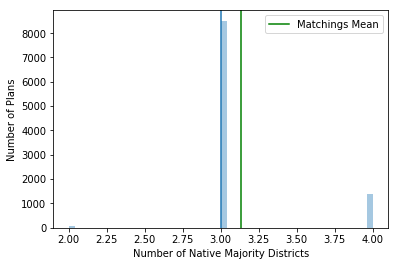

In [103]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.distplot(num_native_maj, kde=False)
#plt.axvline(x=ip["USH18ns"].wins("Democratic"),color='r',label='Enacted')
plt.axvline(x=np.mean(num_native_maj),color='g',label='Matchings Mean')
plt.axvline(x=3)
plt.ylabel("Number of Plans")
plt.xlabel("Number of Native Majority Districts")
plt.legend()
plt.savefig('nativemaj.png')



In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.distplot(nat, kde=False)
plt.axvline(x=ip["USH18ns"].wins("Democratic"),color='r',label='Enacted')
plt.axvline(x=np.mean(wins4),color='g',label='Matchings Mean')
plt.ylabel("Number of Plans")
plt.xlabel("Number of Democrat House Seats")
plt.legend()
plt.savefig('USH18nswins4.png')



In [81]:
with open('AK_30k_num_matchings.json', "w") as m:
    m.write(json.dumps((num_matchings)))

TypeError: '>' not supported between instances of 'NoneType' and 'float'

In [79]:
with open('AK_30k_percents1.json', "w") as m:
    m.write(json.dumps(percents1))
with open('AK_30k_percents2.json', "w") as m:
    m.write(json.dumps(percents2))
with open('AK_30k_percents3.json', "w") as m:
    m.write(json.dumps(percents3))
with open('AK_30k_percents4.json', "w") as m:
    m.write(json.dumps(percents4))

In [80]:
with open('AK_30k_wins1.json', "w") as m:
    m.write(json.dumps(wins1))
with open('AK_30k_wins2.json', "w") as m:
    m.write(json.dumps(wins2))
with open('AK_30k_wins3.json', "w") as m:
    m.write(json.dumps(wins3))
with open('AK_30k_wins4.json', "w") as m:
    m.write(json.dumps(wins4))

In [65]:
with open('AK_30k_native_percents.json', "w") as m:
    m.write(json.dumps(native_percents))

In [77]:
with open('AK_30k_num_edges.json', "w") as m:
    m.write(json.dumps(np.array(num_edges).tolist())

SyntaxError: unexpected EOF while parsing (<ipython-input-77-67ac46efa6e0>, line 2)

In [78]:
print(num_edges)

[matrix([[3. , 2.5, 4.5, 4.5, 2.5, 3.5, 2. , 2. , 4. , 2.5, 2.5, 2.5, 3. ,
         3.5, 2. , 3. , 3.5, 2.5, 1. , 0.5, 2.5, 1. , 3.5, 1. , 2.5, 2.5,
         1.5, 0.5, 2. , 1.5, 2. , 1.5, 2. , 3.5, 1.5, 2. , 2. , 1.5, 1.5,
         1. ]]), matrix([[3. , 2.5, 4.5, 4.5, 2. , 4. , 4. , 2. , 4. , 2.5, 2.5, 2.5, 3. ,
         3.5, 2. , 3. , 2. , 2.5, 1. , 0.5, 2.5, 2.5, 1. , 3.5, 1. , 2.5,
         1.5, 0.5, 1.5, 2. , 1.5, 1.5, 2. , 3.5, 1.5, 2. , 2. , 1.5, 1.5,
         1. ]]), matrix([[3. , 2.5, 4.5, 4.5, 2. , 4. , 4. , 2. , 4. , 2.5, 2.5, 2.5, 3. ,
         3.5, 2. , 3. , 2. , 2.5, 1. , 0.5, 2.5, 2.5, 1. , 3.5, 1. , 2.5,
         1.5, 0.5, 1.5, 2. , 1.5, 1.5, 2. , 3.5, 1.5, 2. , 2. , 1.5, 1.5,
         1. ]]), matrix([[3. , 2.5, 4.5, 4.5, 2. , 4. , 4. , 2. , 4. , 2.5, 2.5, 2.5, 3. ,
         3.5, 2. , 3. , 2.5, 1. , 0.5, 2.5, 2.5, 1. , 3.5, 1. , 2.5, 1.5,
         0.5, 1.5, 2. , 1.5, 2. , 1.5, 1.5, 2. , 3.5, 1.5, 2. , 2. , 1.5,
         1. ]]), matrix([[3. , 2.5, 4.5, 4.5, 4. , 4. , 2.5,

AttributeError: 'ElectionResults' object has no attribute 'native_percents'

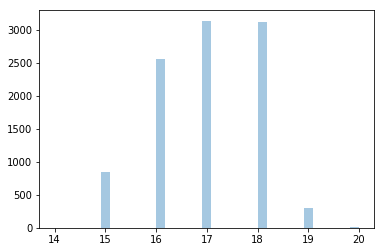

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.distplot(wins4,kde=False)
plt.axvline(x=ip["USH18ns"].native_percents("Democratic"),color='r',label='Enacted')
plt.axvline(x=np.mean(native_percents),color='g',label='Matchings Mean')


In [67]:
#initial_partition = GeographicPartition(graph, assignment="HDIST", updaters=my_updaters) #NOTE: assignment based on House Districts
#sorted(initial_partition["Native_percent"].percents("Native"))

[0.03138710766115423,
 0.034796273431361546,
 0.03773051250141419,
 0.04153228088043909,
 0.04401535807690168,
 0.04711570898459463,
 0.04791972037433758,
 0.04923320694923886,
 0.0498220640569395,
 0.0532899534414091,
 0.0553172273650937,
 0.05580923389142567,
 0.05795955259292735,
 0.06442483768936241,
 0.0650539761487594,
 0.06539540100953449,
 0.07099219368706867,
 0.07209144409234948,
 0.07231765699802872,
 0.07601179004648,
 0.08296139254630663,
 0.08620880949739265,
 0.09071032124236138,
 0.09395517319447588,
 0.09871413330338592,
 0.09912389082331799,
 0.10816429735348654,
 0.1110181311018131,
 0.11965233096286262,
 0.13535582648142896,
 0.1408546235586706,
 0.14453345368385423,
 0.16086740056425292,
 0.19222777559386758,
 0.20246844319775595,
 0.21248741188318226,
 0.4281292984869326,
 0.6643768400392541,
 0.8349481363273681,
 0.8371329976806019]

In [44]:
print(matrix)


[[[0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,

Everything below this is "extra" 

In [ ]:
chain_dfs = {"GOV18": [],
             "USH18": []}

for key, val in chain_results.items():
    chain_dfs[key] = pandas.DataFrame(val)

In [ ]:
chain_results = {"GOV18": [],
                 "USH18": []}

for partition in chain:
    for key, _ in chain_results.items():
        chain_results[key].append(sorted(partition[key].percents("Democratic"))) 

In [ ]:
print(edge_totals)
print(max(edge_totals))
print(min(edge_totals))


In [ ]:
for i in range(1000):
    with open("./Assignments/AK_House_"+str(i)+".json",'w') as wf:
        json.dump(dict(allAssignments[i]), wf)

In [ ]:
#data = json.dumps(networkx.readwrite.json_graph.adjacency_data(graph))
#It won't let me save graph due to a Polygon error- not a major issue for me atm 
#with open('/Users/caranix/Documents/alaska_graphAK_DATA.json') as f:
#        data = json.load(f)
#graph = networkx.readwrite.json_graph.adjacency_graph(data)
#this is for when I can fix saving the grpah as a .json

In [ ]:
#allAssignments[1]

In [ ]:
#dict(step.assignment)


In [ ]:
chain.counter

In [ ]:
allAssignments

In [ ]:
import geopandas as gpd

In [ ]:
df = gpd.read_file("/Users/caranix/Documents/MGGG/AK_precincts/alaska_precincts.shp")

In [ ]:
for i in range(1000):
    df["plan"+str(i)] = df.index.map(dict(allAssignments[i]))

In [ ]:
plt.figure()
df.plot(column="plan200", cmap = "hsv")
plt.axis('off')


In [ ]:
for i in range(1000):
    if i % 100 == 0:
        plt.figure()
        df.plot(column="plan"+str(i), cmap = "hsv")
        plt.axis('off')
        plt.savefig("./Pictures/AK_plot_"+str(i)+".png", dpi=2000)  
        plt.close()

In [ ]:
new_part = GeographicPartition(graph, assignment=df["plan11"], updaters=my_updaters)#NOTE: assignment based on House Districts


In [ ]:
chain_results = {"GOV18": [],
                 "USH18": []}

for key in chain_results.keys():
    chain_results[key].append(sorted(new_part[key].percents("Democratic"))) 


In [ ]:
pop_vals = [list(partition["population"].values()) for partition in chain]
data= pandas.DataFrame(pop_vals)
print(data)
 

In [ ]:
#house district 1 population values over 1,000 steps of chain 
print(data[0]) 


In [ ]:
#print(data[0].idxmax())
#print(data[0].max())

for i in range(40):
    print("on step "+ str(data[i].idxmax()) + " HD " +str(i+1)+ " reached it's max population: " + str(data[i].max()))

In [ ]:
data.idxmax()
#what step of chain the house district reaches a max. 

In [ ]:
a= data.max(axis=0) #max of each row 
#a.max(axis=0) 
print(a)
a.idxmax()

#max population of a plan 


In [ ]:
data.min(axis=1)

In [ ]:
data.idxmin()

In [ ]:
for i in range(40): 
    data[i].max()

In [ ]:
max_vals = [data[i].max() for i in range(40)]
MAX= max(max_vals)
#max_index= max_vals.maxidx()
#print("max index" +str(max_index))
print(max_vals) #max value for each district 
print("highest population a district has: " +str(MAX)) 

min_vals = [data[i].min() for i in range(40)]
MIN= min(min_vals)
print(min_vals)
print("lowest population a district has: " +str(MIN)) 

print("difference: " + str(MAX-MIN))
#note that this is not within the same plan, but over all of chain 


In [ ]:
#within same plan...

In [ ]:
#deviation btwn single step in chain 

data.max(axis=1)- data.min(axis=1) #max of each row 

In [ ]:
test= data.max(axis=1)- data.min(axis=1)
print(test.idxmax()) #happens on the 426th step of chain 
print(test.max()) #the max divation is 1,754 people between two house districts. 
print(test.max()/ideal_population)

print(test.idxmin()) #happens on the 0th step of chain 
print(test.min()) #the min deviation is 754 people between two house districts. 
print(test.min()/ideal_population)



In [ ]:
plt.figure()
df.plot(column="plan426", cmap = "hsv")
plt.axis('off')


In [ ]:
with open('edge_totals_small.json', "w") as m:
    m.write(json.dumps(edge_totals))
with open('matrix_small.json', "w") as l:
    l.write(json.dumps(matrix))

In [ ]:
with open('edge_totals_small.json', "w") as m:
    m.write(json.dumps(edge_totals))
with open('matrix_small.json', "w") as l:
    l.write(json.dumps(matrixs))

In [ ]:
seat_results= {"GOV18": [],
               "USH18": []}
#print(initial_partition)


#for key, _ in seat_results.items():
 #   seat_results[key].append(initial_partition[key].seats())

In [ ]:
#THIS CHAIN IS  WORKING!! (but it isn't based on proposal, but propose_random_flip)


#chain = gerrychain.MarkovChain(
#    proposal=propose_random_flip,
#    constraints=[constraints.within_percent_of_ideal_population(initial_partition, .03), no_more_discontiguous, compactness_bound],
#    accept=always_accept,
#    initial_state=initial_partition,
#    total_steps=1000
#)
